In [2]:
import pandas as pd
drug_df = pd.read_csv("Data/drug.csv")
drug_df = drug_df.sample(frac=1)
drug_df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
146,37,F,LOW,NORMAL,12.006,drugX
62,67,M,LOW,NORMAL,20.693,DrugY
131,52,M,LOW,NORMAL,32.922,DrugY


In [5]:
from sklearn.model_selection import train_test_split

X = drug_df.drop("Drug", axis=1).values
y = drug_df.Drug.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125
)

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Definisi kolom kategorikal dan numerik
cat_col = [1, 2, 3]
num_col = [0, 4]

# ColumnTransformer (masih bermasalah karena duplikasi pemrosesan num_col)
transform = ColumnTransformer([
    ("encoder", OrdinalEncoder(), cat_col),
    ("num_imputer", SimpleImputer(strategy="median"), num_col),
    ("num_scaler", StandardScaler(), num_col),
])

# Pipeline utama
pipe = Pipeline(steps=[
    ("preprocessing", transform),
    ("model", RandomForestClassifier(n_estimators=100, random_state=125)),
])

# Latih model
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

In [8]:
from sklearn.metrics import accuracy_score, f1_score

# Prediksi
predictions = pipe.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

# Output hasil
print("Accuracy:", f"{round(accuracy * 100, 2)}%")
print("F1 Score :", round(f1, 2))


Accuracy: 93.33%
F1 Score : 0.84


In [16]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {round(accuracy, 2)}, F1 Score = {round(f1, 2)}.")

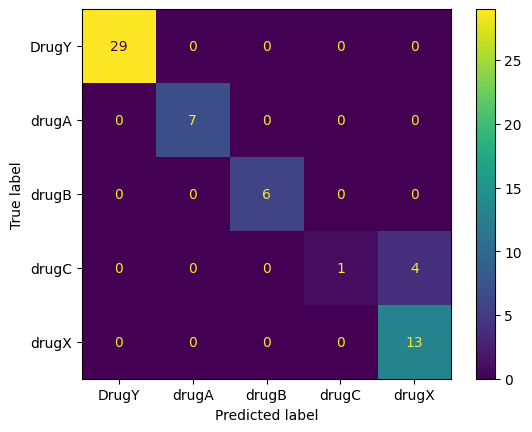

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.savefig("Results/model_results.png",dpi=120)

In [21]:
import skops.io as sio
sio.dump(pipe,
"Model/drug_pipeline.skops")